In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams.update({'font.size': 14})
%matplotlib notebook

<IPython.core.display.Javascript object>


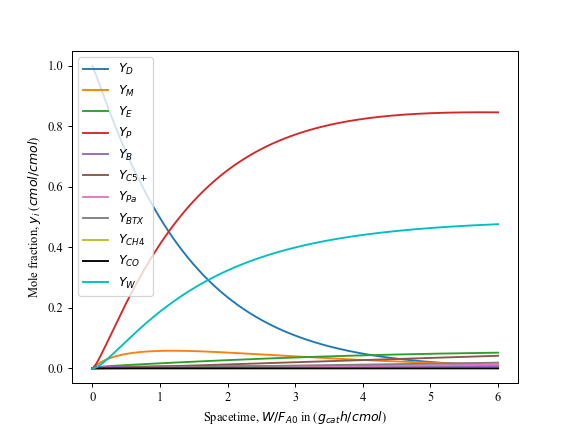

<IPython.core.display.Javascript object>


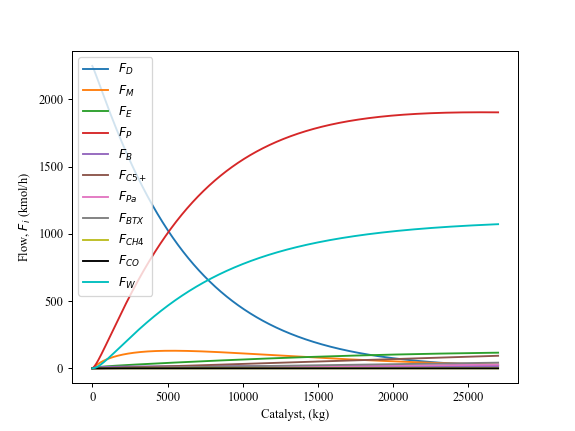

Catalyst to use is = 25889.6135374 kg


In [2]:
T0 = 623 #K
R = 8.206 # (m**3 atm)/ (K mol)
Ka = 1.27e1 #1/atm

k_01 = 4.99e-2 
k_02 = 7.88e1 
k_03 = 2.42e-3 
k_04 = 2.48e-1 
k_05 = 2.54 
k_06 = 1.44e-1 
k_07 = 3.02e1 
k_08 = 2.63 
k_09 = 4.24e-1 
k_010 = 1.03 
k_011 = 1.16e-2 
k_012 = 3.10e-1 
k_013 = 5.63e-4 

f1 = 1.78e-1
f2 = 6.92e-1

k_010 = 1.03 
k_010_1 = k_010*f1
k_010_2 = k_010*f2

k_012 = 3.10e-1
k_012_1 = k_012*f1
k_012_2 = k_012*f2

E1 = 4.2e1
E2 = 1.2e1
E3 = 3.4e1
E4 = 1.7e1
E5 = 2.6e1
E6 = 9.8e1
E7 = 1.6e1
E8 = 1.7e1
E9 = 6.9e1
E10 = 2.1e1
E11 = 6e-1
E12 = 2.1e1
E13 = 3.4e1

def ri(x):
    pD,pM,pE,pP,pB,pC5_plus,pPa,pBTX,pCH4,pCO,pW= x
    
    K2 = np.exp(-(-9.76 + 3200/T + 1.07*np.log(T) -6.6e-4*T + 4.9e-8*T**2 + 6500/T**2)) #'dimensionless'
   
    θ = 1/(1 + Ka*(pM + pW)) #dimensionless

    k1 = k_01*np.exp((-E1/R)*(1/T - 1/T0)) #molc/(gcat h atm)#I think this should be: molc/(gcat h atm)
    k2 = k_02*np.exp((-E2/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)#should be: molc/(gcat h atm**2)
    k3 = k_03*np.exp((-E3/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k4 = k_04*np.exp((-E4/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k5 = k_05*np.exp((-E5/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k6 = k_06*np.exp((-E6/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k7 = k_07*np.exp((-E7/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k8 = k_08*np.exp((-E8/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k9 = k_09*np.exp((-E9/R)*(1/T - 1/T0)) #molc/(gcat h atm**2)
    k10 = k_010*np.exp((-E10/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k10_1 = k_010_1*np.exp((-E10/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k10_2 = k_010_2*np.exp((-E10/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k11 = k_011*np.exp((-E11/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k12 = k_012*np.exp((-E12/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k12_1 = k_012_1*np.exp((-E12/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k12_2 = k_012_2*np.exp((-E12/R)*(1/T - 1/T0)) #molc/(gcat h atm)
    k13 = k_013*np.exp((-E13/R)*(1/T - 1/T0)) #molc/(gcat h atm)


    r1 = k1*pD*θ #because units were fixed this is: molc/(gcat h)
    r2 = k2*(pD*pW - (pM**2)/K2)*θ #reversible reaction
    r3 = k3*pM*θ
    r4 = k4*pD*pE*θ
    r5 = k5*pD*pP*θ
    r6 = k6*pD*pB*θ
    r7 = k7*pM*pE*θ
    r8 = k8*pM*pP*θ
    r9 = k9*pM*pB*θ
    r10 = k10*pP*θ
    r10_1 = k10_1*pE*θ
    r10_2 = k10_2*pB*θ
    r11 = k11*pC5_plus*θ
    r12 = k12*pP*θ
    r12_1 = k12_1*pE*θ
    r12_2 = k12_2*pB*θ
    r13 = k13*pD*θ

    rD = -6*r1 -2*r2 -2*r4 -2*r5 -2*r6 -6*r13 #molDc/ (gcat h)
    rM = 2*r2 -3*r3 -r7 -r8 - r9 #molMc/ (gcat h)
    rE = 2*r1 + r3 + 2*r4 + r7 - r10_1 -2.5*r12_1 #molEc/ (gcat h)
    rP = 2*r1 + r3 +2*r5 + r8 -r10 -2.5*r12 #molPc/ (gcat h)
    rB = 2*r1 + r3 +2*r6 + r9 - r10_2 -2.5*r12_2 #molBc/ (gcat h)
    rC5_plus = r10 + r10_1 + r10_2 - 2.5*r11 #molC5_plusc/ (gcat h)
    rPa = r11 + r12 + r12_1 + r12_2 #molPac/ (gcat h)
    rBTX = 1.5*r11 + 1.5*r12 + 1.5*r12_1 + 1.5*r12_2 #molBTXDc/ (gcat h)
    rCH4 = 4*r13 #molCH4c/ (gcat h)
    rCO = 2*r13 #molCOc/ (gcat h)
    rW = r1 - r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9  #molWc/ (gcat h)
    
    return [rD,rM,rE,rP,rB,rC5_plus,rPa,rBTX,rCH4,rCO,rW]

def cmolbalance(variables, catalyst):
    rD,rM,rE,rP,rB,rC5_plus,rPa,rBTX,rCH4,rCO,rW = ri(variables)
    
    dyDdW_FA0 = rD #molDc/ (gcat h)
    dyMdW_FA0 = rM
    dyEdW_FA0 = rE
    dyPdW_FA0 = rP
    dyBdW_FA0 = rB
    dyC5_plusdW_FA0 = rC5_plus
    dyPadW_FA0 = rPa
    dyBTXdW_FA0 = rBTX
    dyCH4dW_FA0 = rCH4
    dyCOdW_FA0 = rCO
    dyWdW_FA0 = rW
    return [dyDdW_FA0,dyMdW_FA0,dyEdW_FA0,dyPdW_FA0,dyBdW_FA0,dyC5_plusdW_FA0,
            dyPadW_FA0,dyBTXdW_FA0,dyCH4dW_FA0,dyCOdW_FA0,dyWdW_FA0]

#Scale up for reactor:
cmolfactor = 2 #cmol DME/mol DME
FA0 = 2247.84*cmolfactor*1000 #cmol DME feed (to reactor inlet)

Pin = 19.96 #atm (#set to P=24.85 atm for T = 573 K)
T= 473 #K (#set to T=473K for P=19.96 atm)
variables = [Pin,0,0,0,0,0,0,0,0,0,0]
spacetime = np.linspace(0,6,10000) # gcat h/ cmol
solve  = odeint(cmolbalance, variables, spacetime)
Ptotal = Pin #atm

plt.figure(1)
plt.plot(spacetime, solve[:,0]/Pin, label='$Y_D$')
plt.plot(spacetime, solve[:,1]/Pin, label='$Y_M$')
plt.plot(spacetime, solve[:,2]/Pin, label='$Y_E$')
plt.plot(spacetime, solve[:,3]/Pin, label='$Y_P$')
plt.plot(spacetime, solve[:,4]/Pin, label='$Y_B$')
plt.plot(spacetime, solve[:,5]/Pin, label='$Y_{C5+}$')
plt.plot(spacetime, solve[:,6]/Pin, label='$Y_{Pa}$')
plt.plot(spacetime, solve[:,7]/Pin, label='$Y_{BTX}$')
plt.plot(spacetime, solve[:,8]/Pin, label='$Y_{CH4}$')
plt.plot(spacetime, solve[:,9]/Pin, label='$Y_{CO}$', color='black')
plt.plot(spacetime, solve[:,10]/Pin, label='$Y_W$', color='c')
plt.xlabel('Spacetime, $W/F_{A0}$ in ($g_{cat} h/ cmol$)')
plt.ylabel('Mole fraction, $y_i$ ($cmol/cmol$)')
plt.legend(loc='best')
plt.show()
plt.savefig("figure1.png")

moleflow = solve*FA0/cmolfactor/Ptotal/1000 #kmol i/h
catalyst_scaled = spacetime*FA0/1000 # kg

plt.figure(2)
plt.plot(catalyst_scaled, moleflow[:,0], label='$F_D$')
plt.plot(catalyst_scaled, moleflow[:,1], label='$F_M$')
plt.plot(catalyst_scaled, moleflow[:,2], label='$F_E$')
plt.plot(catalyst_scaled, moleflow[:,3], label='$F_P$')
plt.plot(catalyst_scaled, moleflow[:,4], label='$F_B$')
plt.plot(catalyst_scaled, moleflow[:,5], label='$F_{C5+}$')
plt.plot(catalyst_scaled, moleflow[:,6], label='$F_{Pa}$')
plt.plot(catalyst_scaled, moleflow[:,7], label='$F_{BTX}$')
plt.plot(catalyst_scaled, moleflow[:,8], label='$F_{CH4}$')
plt.plot(catalyst_scaled, moleflow[:,9], label='$F_{CO}$', color='black')
plt.plot(catalyst_scaled, moleflow[:,10], label='$F_W$', color='c')
plt.xlabel('Catalyst, (kg)')
plt.ylabel('Flow, $F_i$ (kmol/h)')
plt.legend(loc='best')
plt.show()
plt.savefig("figure2.png")

Total_catalyst = catalyst_scaled[moleflow[:,3].argmax()] #Finds the catalyst for maximum propene
print ('Catalyst to use is =', Total_catalyst, 'kg')

In [3]:
#Pressure drop --> Ergun?
#Heat exchange?